In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = sns.load_dataset("flights")
df.head()

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121


In [3]:
df['yearMonth'] = "01-"+df['month'].astype(str)+"-"+df['year'].astype(str)
df['yearMonth'] = pd.to_datetime("01-"+df['month'].astype(str)+"-"+df['year'].astype(str))
df.set_index('yearMonth',inplace=True)

In [4]:
# create columns fro one month and oneyear lagged
airP = df[['passengers']].copy(deep=True)
airP['firstDiff']=airP['passengers'].diff()
airP['Diff12']=airP['passengers'].diff(12) #This will be used later in SARIMAX

airP.head(24)

,passengers,firstDiff,Diff12
yearMonth,,,
1949-01-01,112,NaN,NaN
1949-02-01,118,6.0,NaN
1949-03-01,132,14.0,NaN
1949-04-01,129,-3.0,NaN
1949-05-01,121,-8.0,NaN
1949-06-01,135,14.0,NaN
1949-07-01,148,13.0,NaN
1949-08-01,148,0.0,NaN
1949-09-01,136,-12.0,NaN


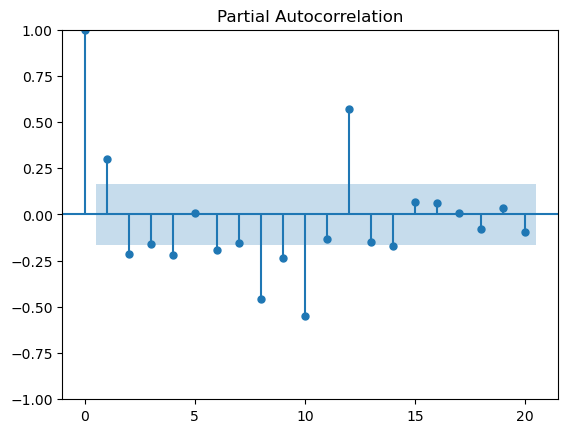

In [5]:
# Now ARIMA
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import acf,plot_acf,plot_pacf

plot_pacf(airP['firstDiff'].dropna(),lags=20)
plt.show()

#shaded area is insignificant area
#PACF gives us the auto regressive values
# First p is 1,whose value is 0.31
#So teh significant p values are 1,2,4,6,etc

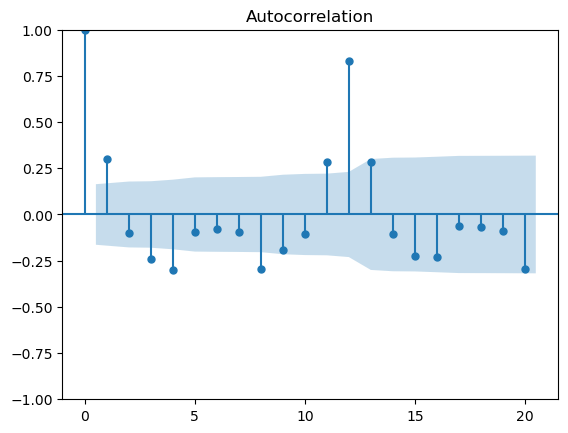

In [6]:
# NOw let us take this value as p and find q,for which we need ACF
plot_acf(airP['firstDiff'].dropna(),lags=20)
plt.show()

In [7]:
train = airP[:round(len(airP)*70/100)] # Take the first 70% data
print(train.tail()) # Just to check where it ends

            passengers  firstDiff  Diff12
yearMonth                                
1957-01-01         315        9.0    31.0
1957-02-01         301      -14.0    24.0
1957-03-01         356       55.0    39.0
1957-04-01         348       -8.0    35.0
1957-05-01         355        7.0    37.0


In [8]:
test = airP[round(len(airP)*70/100):] # Take the last 30% data, starting from 71%
print(test.head()) # Just to check where it starts

            passengers  firstDiff  Diff12
yearMonth                                
1957-06-01         422       67.0    48.0
1957-07-01         465       43.0    52.0
1957-08-01         467        2.0    62.0
1957-09-01         404      -63.0    49.0
1957-10-01         347      -57.0    41.0


In [9]:
model = ARIMA(train['passengers'],order=(1,1,1)) # Parameters: p, d, q
model_fit = model.fit()


/home/dai/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/home/dai/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/home/dai/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [10]:
prediction = model_fit.predict(start = test.index[0], end = test.index[-1])

In [17]:
airP['arimaPred'] = prediction
print(airP.tail())

            passengers  firstDiff  Diff12   arimaPred
yearMonth                                            
1960-08-01         606      -16.0    47.0  363.488695
1960-09-01         508      -98.0    45.0  363.488695
1960-10-01         461      -47.0    54.0  363.488695
1960-11-01         390      -71.0    28.0  363.488695
1960-12-01         432       42.0    27.0  363.488695


In [14]:
airP.head()

,passengers,firstDiff,Diff12
yearMonth,,,
1949-01-01,112,NaN,NaN
1949-02-01,118,6.0,NaN
1949-03-01,132,14.0,NaN
1949-04-01,129,-3.0,NaN
1949-05-01,121,-8.0,NaN


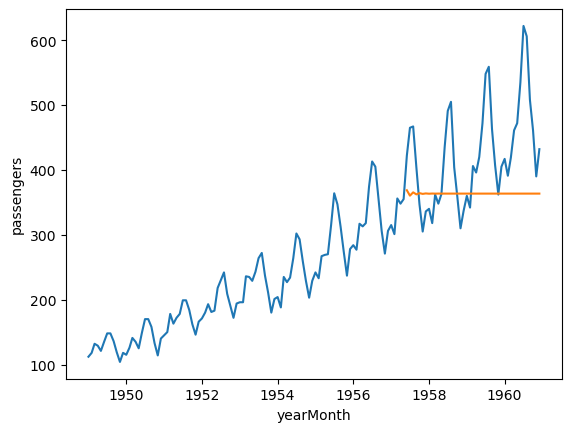

In [18]:
sns.lineplot(data=airP,x=airP.index,y='passengers')
sns.lineplot(data=airP,x=airP.index,y=airP['arimaPred'])
plt.show()